# Modern Portfolio Theory

## Profesor: 
- Act. Jesús Enrique Miranda Blanco

## Materia: 
- Aplicación de las matemáticas financieras

![title](trading.png)

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from numpy.linalg import inv
%matplotlib inline

In [2]:
pdr.__version__

'0.10.0'

In [3]:
tickers_stocks = ['TSLA', 'AMZN', 'NVDA', "AAPL", "C","PEP","IBM"]

In [4]:
data = pdr.data.DataReader(tickers_stocks, 'yahoo', start='2018/01/01', end='2021/05/01')
data = data['Adj Close']
data.head()

Symbols,TSLA,AMZN,NVDA,AAPL,C,PEP,IBM
Date,,,,,,,
2018-01-02,64.106003,1189.010010,49.372395,41.075397,64.795654,104.085381,118.899597
2018-01-03,63.450001,1204.199951,52.621780,41.068249,64.996063,103.812073,122.167915
2018-01-04,62.924000,1209.589966,52.899158,41.259010,65.797737,104.323418,124.642281
2018-01-05,63.316002,1229.140015,53.347435,41.728760,65.710594,104.623154,125.251228
2018-01-08,67.281998,1246.869995,54.982044,41.573761,64.943779,104.023659,126.006607


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 838 entries, 2018-01-02 to 2021-04-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    838 non-null    float64
 1   AMZN    838 non-null    float64
 2   NVDA    838 non-null    float64
 3   AAPL    838 non-null    float64
 4   C       838 non-null    float64
 5   PEP     838 non-null    float64
 6   IBM     838 non-null    float64
dtypes: float64(7)
memory usage: 52.4 KB


In [6]:
# Log-rendimientos
df_log = np.log(data.pct_change()+1)
df_log.head()

Symbols,TSLA,AMZN,NVDA,AAPL,C,PEP,IBM
Date,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.010286,0.012694,0.063739,-0.000174,0.003088,-0.002629,0.027117
2018-01-04,-0.008325,0.004466,0.005257,0.004634,0.012259,0.004914,0.020051
2018-01-05,0.006210,0.016033,0.008438,0.011321,-0.001325,0.002869,0.004874
2018-01-08,0.060755,0.014322,0.030181,-0.003721,-0.011738,-0.005747,0.006013


In [7]:
df_log = df_log.dropna(axis=0)
df_log.head()

Symbols,TSLA,AMZN,NVDA,AAPL,C,PEP,IBM
Date,,,,,,,
2018-01-03,-0.010286,0.012694,0.063739,-0.000174,0.003088,-0.002629,0.027117
2018-01-04,-0.008325,0.004466,0.005257,0.004634,0.012259,0.004914,0.020051
2018-01-05,0.006210,0.016033,0.008438,0.011321,-0.001325,0.002869,0.004874
2018-01-08,0.060755,0.014322,0.030181,-0.003721,-0.011738,-0.005747,0.006013
2018-01-09,-0.008118,0.004665,-0.000270,-0.000115,0.010411,0.000762,0.002200


In [8]:
%%time
df_log.corr()

CPU times: user 1.21 ms, sys: 196 µs, total: 1.41 ms
Wall time: 1.2 ms


Symbols,TSLA,AMZN,NVDA,AAPL,C,PEP,IBM
Symbols,,,,,,,
TSLA,1.000000,0.405808,0.427965,0.436585,0.306605,0.241413,0.248595
AMZN,0.405808,1.000000,0.634311,0.659570,0.327001,0.358430,0.399722
NVDA,0.427965,0.634311,1.000000,0.658606,0.421163,0.405948,0.449622
AAPL,0.436585,0.659570,0.658606,1.000000,0.493363,0.522056,0.492457
C,0.306605,0.327001,0.421163,0.493363,1.000000,0.459464,0.632590
PEP,0.241413,0.358430,0.405948,0.522056,0.459464,1.000000,0.545484
IBM,0.248595,0.399722,0.449622,0.492457,0.632590,0.545484,1.000000


In [9]:
df_log.shape

(837, 7)

In [10]:
df_log.reset_index().Date.dt.year.value_counts()

2020    253
2019    252
2018    250
2021     82
Name: Date, dtype: int64

<AxesSubplot:xlabel='Date'>

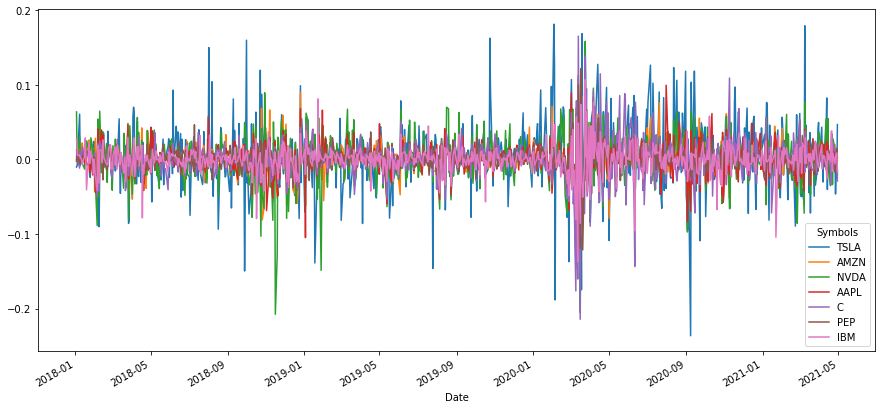

In [11]:
df_log.plot(figsize=(15,7))

Stock: TSLA


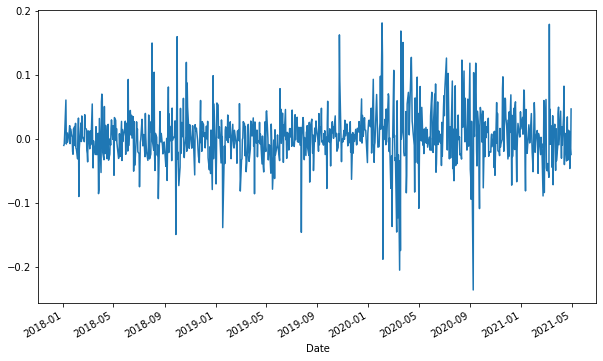

Stock: AMZN


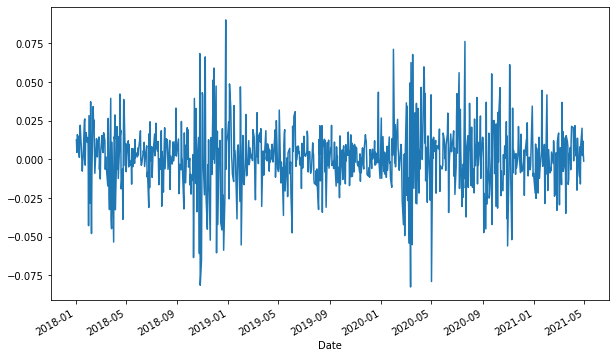

Stock: NVDA


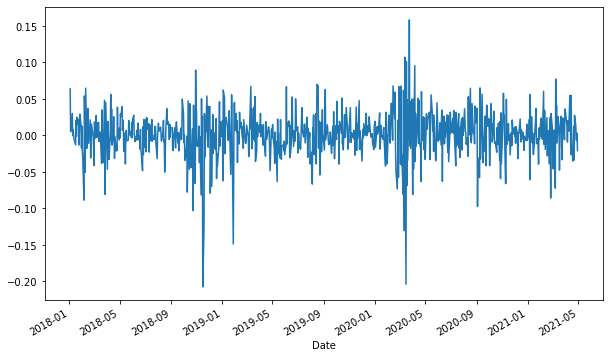

Stock: AAPL


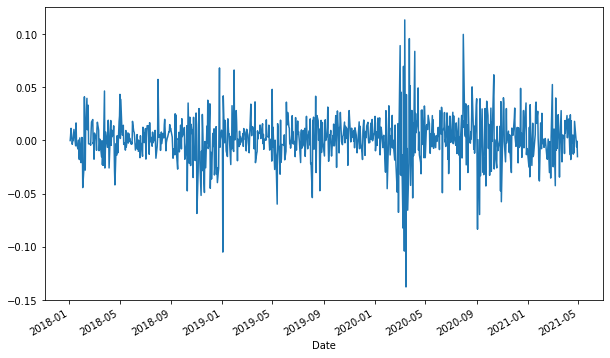

Stock: C


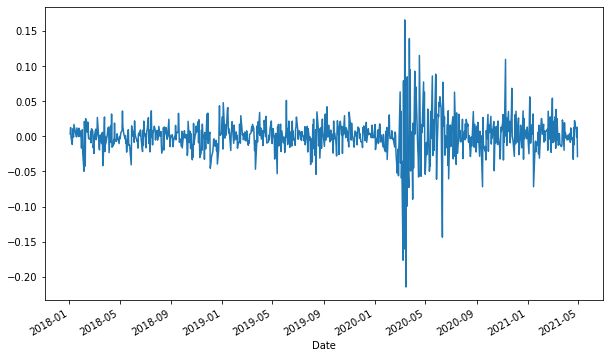

Stock: PEP


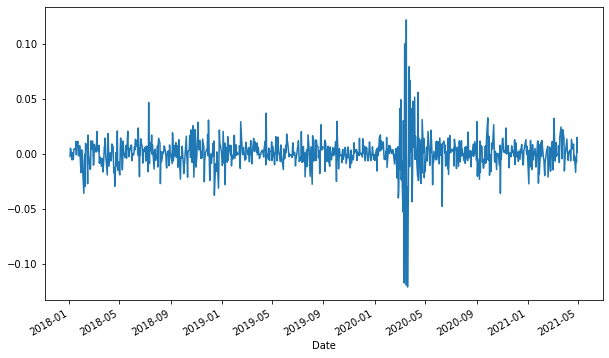

Stock: IBM


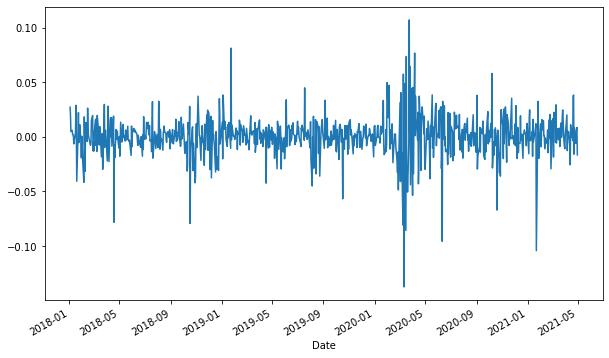

In [12]:
for stock in tickers_stocks:
    print(F"Stock: {stock}")
    df_log[stock].plot(figsize=(10,6))
    plt.show()
    

In [13]:
# number of periods per year
df_log[df_log.index.year == 2020].shape[0]

253

array([[<AxesSubplot:title={'center':'TSLA'}>,
        <AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'NVDA'}>],
       [<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PEP'}>],
       [<AxesSubplot:title={'center':'IBM'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

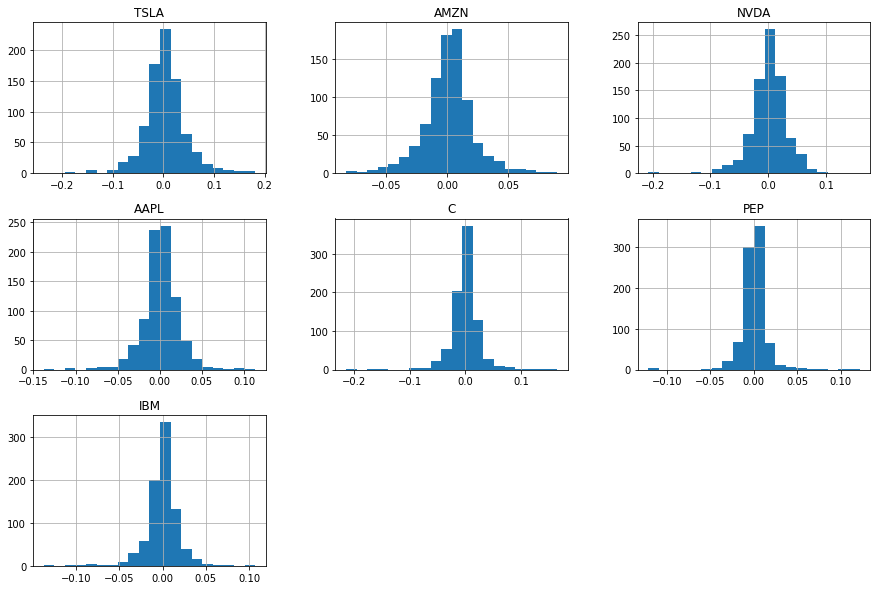

In [14]:
df_log.hist(bins=20,figsize=(15,10))

## Skewness


![title](Skewness_Feature.jpg)


Recall that the skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$



In [15]:
def skewness(r):
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [16]:
skewness(df_log).sort_values()

Symbols
NVDA   -0.889344
IBM    -0.769045
C      -0.683165
PEP    -0.575781
AAPL   -0.349927
TSLA   -0.132765
AMZN   -0.109540
dtype: float64

In [17]:
normal_rets = np.random.normal(0, .2, (10000, 1))
normal_rets.mean(), normal_rets.std()

(0.0005071580660133136, 0.19929140819159713)

In [18]:
skewness(normal_rets)

-0.040560281507097326

# Kurtosis

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

This is very similar to the skewness, so we can just copy and paste it and then edit it to compute the 4th rather than the 3rd power (as was the case for skewness).

In [19]:
def kurtosis(r):
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [20]:
kurtosis(df_log)

Symbols
TSLA     7.379004
AMZN     5.311373
NVDA     9.203046
AAPL     8.580954
C       15.474227
PEP     23.691754
IBM     11.513328
dtype: float64

In [21]:
kurtosis(normal_rets)

2.938026940104579

(array([3.000e+00, 2.000e+00, 6.000e+00, 1.400e+01, 4.700e+01, 1.140e+02,
        2.040e+02, 3.480e+02, 5.330e+02, 8.390e+02, 1.057e+03, 1.176e+03,
        1.220e+03, 1.234e+03, 1.076e+03, 8.380e+02, 5.780e+02, 3.500e+02,
        2.050e+02, 9.600e+01, 3.900e+01, 1.300e+01, 4.000e+00, 3.000e+00,
        1.000e+00]),
 array([-0.80681429, -0.74228197, -0.67774966, -0.61321734, -0.54868502,
        -0.48415271, -0.41962039, -0.35508807, -0.29055576, -0.22602344,
        -0.16149113, -0.09695881, -0.03242649,  0.03210582,  0.09663814,
         0.16117046,  0.22570277,  0.29023509,  0.3547674 ,  0.41929972,
         0.48383204,  0.54836435,  0.61289667,  0.67742898,  0.7419613 ,
         0.80649362]),
 <BarContainer object of 25 artists>)

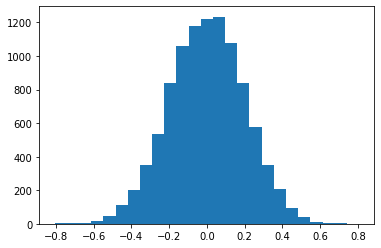

In [22]:
plt.hist(normal_rets, bins=25)

In [23]:
scipy.stats.jarque_bera(df_log["TSLA"])

Jarque_beraResult(statistic=671.2104929025273, pvalue=0.0)

In [24]:
scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=4.342169123558886, pvalue=0.11405385135929236)

At a 1% level of significance for TSLA stock is reject hypothesis of normality because p-value is less than 0.1% (0.0%).
However, for simulated distribution we can accept the hypothesis that the data is normally distributed because p-value is greater than 0.01.

In [25]:
def annualize_rets(r, periods_per_year):
    log_return = r.mean()*periods_per_year
    return log_return

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

In [26]:
an_rets = annualize_rets(df_log, 252)

<AxesSubplot:xlabel='Symbols'>

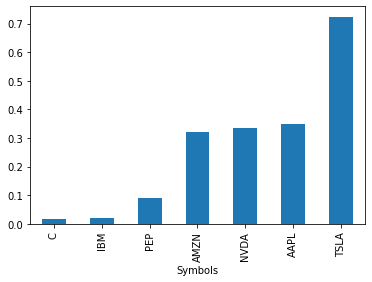

In [27]:
an_rets.sort_values().plot.bar()

Stock: TSLA


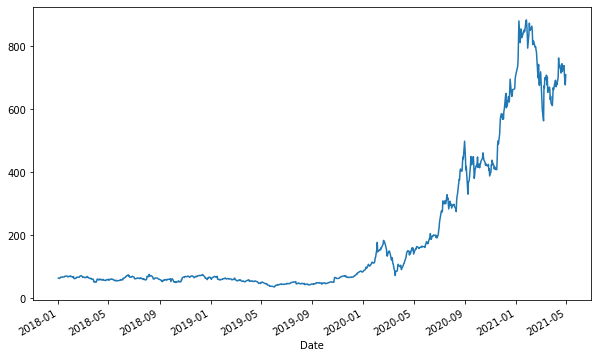

Stock: AMZN


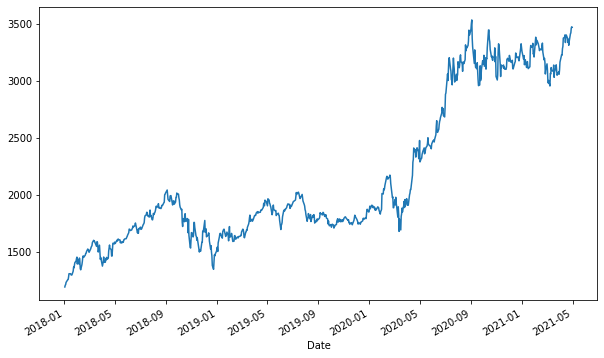

Stock: NVDA


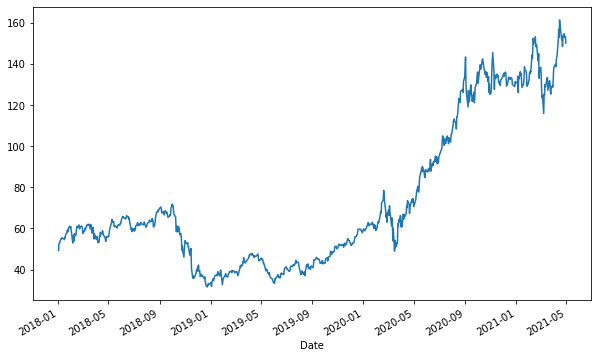

Stock: AAPL


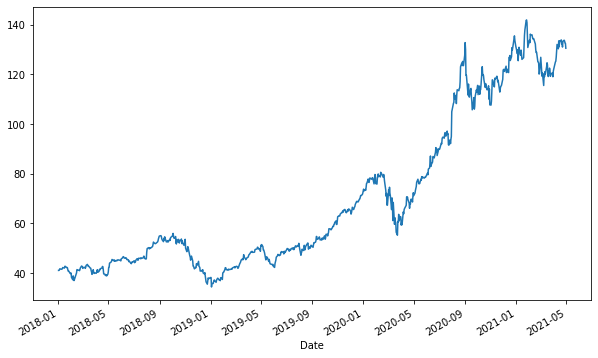

Stock: C


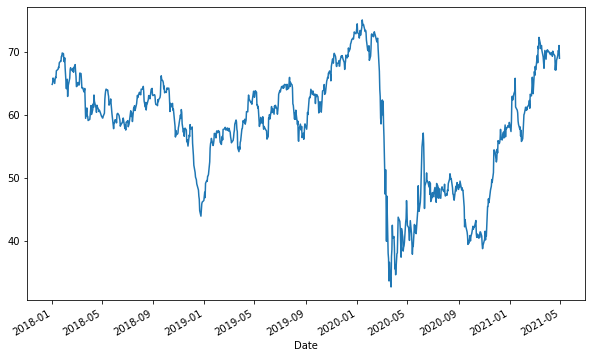

Stock: PEP


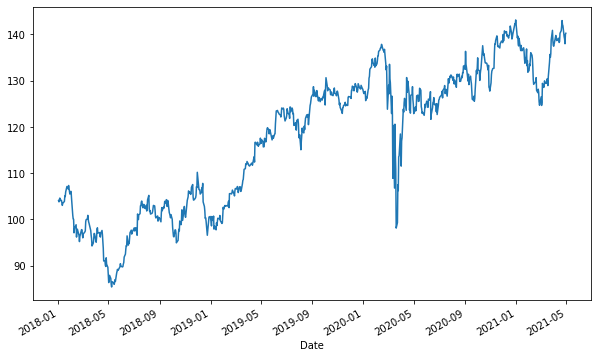

Stock: IBM


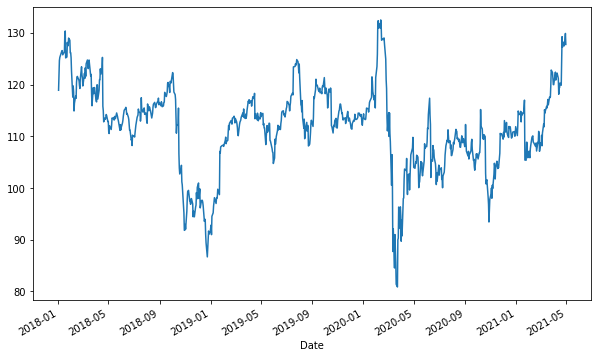

In [28]:
for stock in tickers_stocks:
    print(F"Stock: {stock}")
    data[stock].plot(figsize=(10,6))
    plt.show()
    

<AxesSubplot:xlabel='Date'>

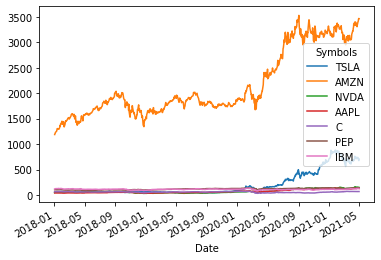

In [29]:
data.plot()

## Correlation and Covariance

In [30]:
df_log.cov()*(252)

Symbols,TSLA,AMZN,NVDA,AAPL,C,PEP,IBM
Symbols,,,,,,,
TSLA,0.463024,0.089671,0.145593,0.103181,0.089537,0.040062,0.050759
AMZN,0.089671,0.105453,0.102982,0.074391,0.045572,0.028386,0.038950
NVDA,0.145593,0.102982,0.249953,0.114362,0.090365,0.049496,0.067453
AAPL,0.103181,0.074391,0.114362,0.120630,0.073539,0.044219,0.051324
C,0.089537,0.045572,0.090365,0.073539,0.184180,0.048088,0.081464
PEP,0.040062,0.028386,0.049496,0.044219,0.048088,0.059475,0.039918
IBM,0.050759,0.038950,0.067453,0.051324,0.081464,0.039918,0.090042


<AxesSubplot:xlabel='Symbols'>

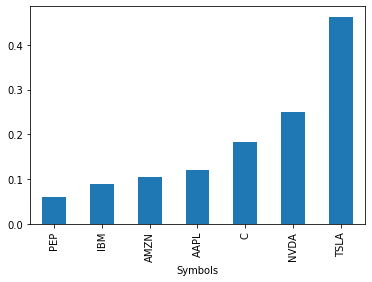

In [31]:
an_var = df_log.var()*(252)
an_var.sort_values().plot.bar()

<AxesSubplot:xlabel='Symbols'>

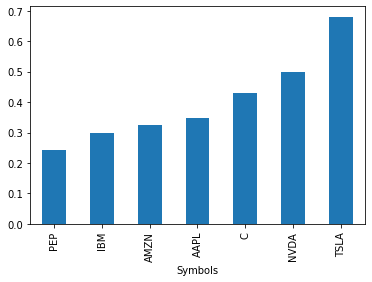

In [32]:
an_std = an_var**.5
an_std.sort_values().plot.bar()

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

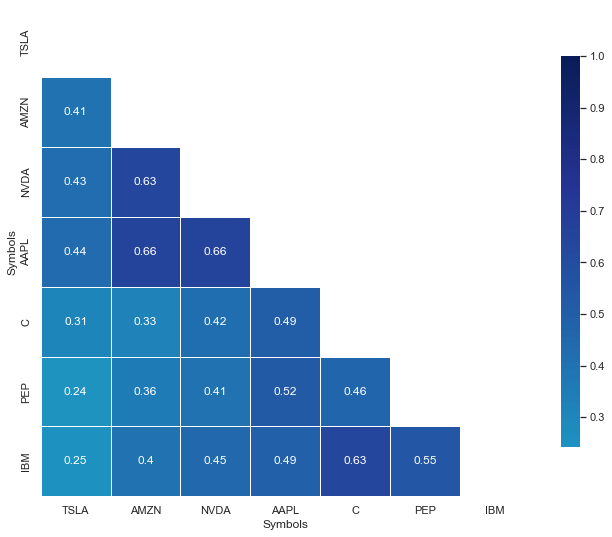

In [33]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df_log.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .8}, annot = True)

### Bitcoin data

<AxesSubplot:xlabel='Date'>

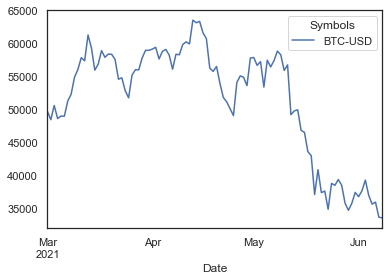

In [34]:
btc_data = pdr.get_data_yahoo(['BTC-USD'], 
                          start=datetime.datetime(2021, 1, 1), 
                          end=datetime.datetime(2021, 6, 7))['Close']

btc_data.tail(100).plot()